In [104]:
from sklearn import linear_model as lm
import pandas as pd
import torch
pd.set_option('display.max_columns', None)
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow as tf
import torch.nn as nn
import keras
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib 
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
from sklearn.naive_bayes import MultinomialNB     # 从sklean.naive_bayes里导入朴素贝叶斯模型
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB


import tensorflow as tf

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'# 只显示 Error
import warnings
warnings.filterwarnings("ignore")
from random import seed
import numpy as np
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

In [7]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

# 1. 数据及其分布

### 1.1:  v+, v-, vv

<AxesSubplot:xlabel='v+ ', ylabel='Density'>

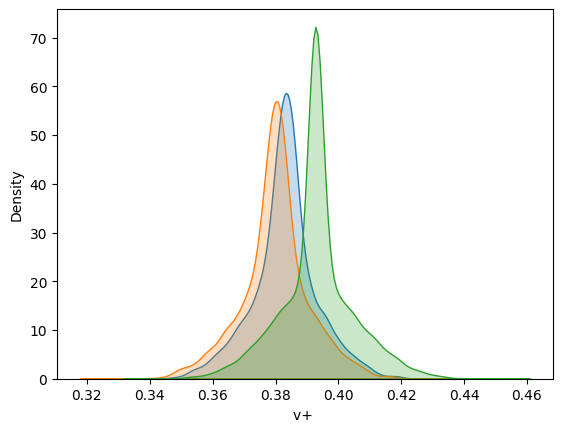

In [19]:
sns.kdeplot(data.iloc[:,1], shade=True)
sns.kdeplot(data.iloc[:,2], shade=True)
sns.kdeplot(data.iloc[:,3], shade=True)

### 1.2: R1, R2, 完全重合

<AxesSubplot:xlabel='R1 ', ylabel='Density'>

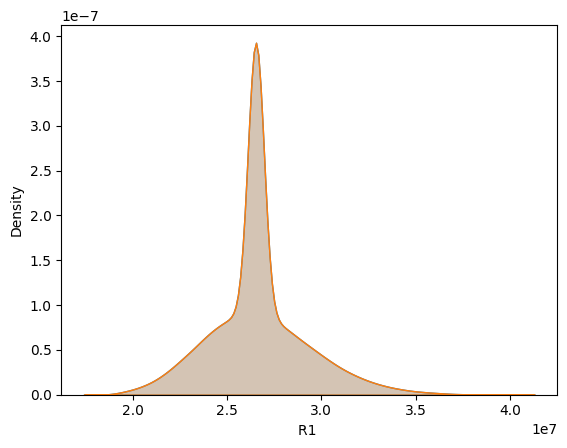

In [20]:
sns.kdeplot(data.iloc[:,4], shade=True)
sns.kdeplot(data.iloc[:,5], shade=True)

### 1.3: R3

<AxesSubplot:xlabel='R3 ', ylabel='Density'>

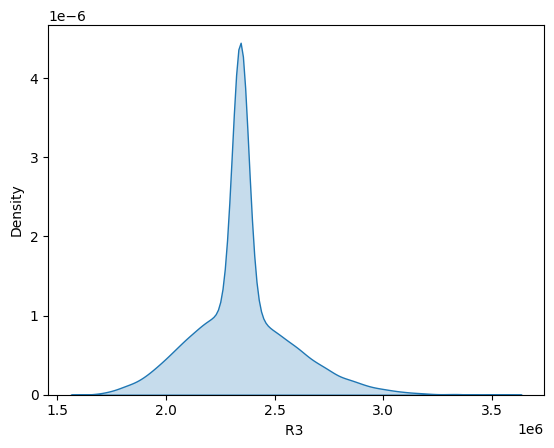

In [21]:
sns.kdeplot(data.iloc[:,6], shade=True)

### 1.4：I3(nA)

<AxesSubplot:xlabel='I3(nA)', ylabel='Density'>

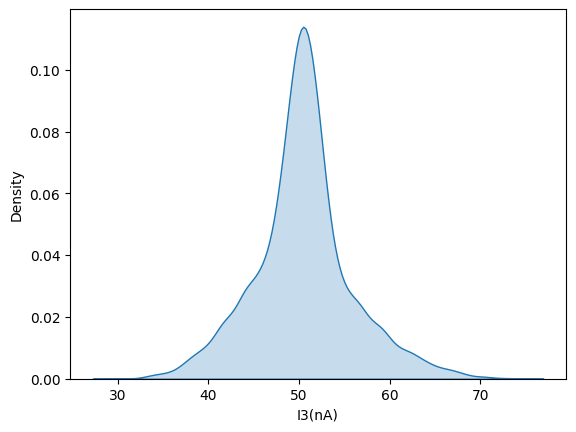

In [22]:
sns.kdeplot(data.iloc[:,7], shade=True)

### 1.5: 我们应该调整该数据嘛？（R2/R1)

<AxesSubplot:xlabel='R2/R1', ylabel='Density'>

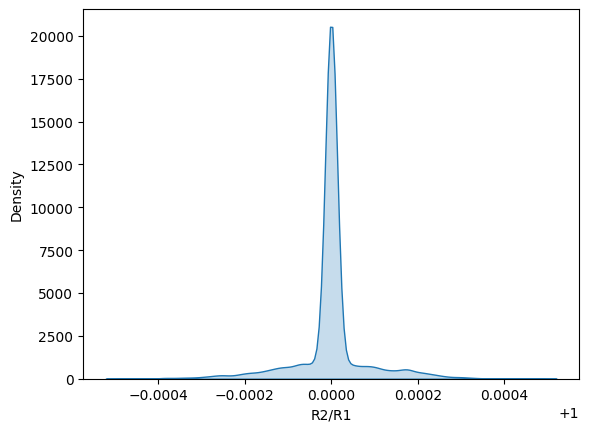

In [23]:
sns.kdeplot(data.iloc[:,8], shade=True)

### 1.6 这是R3/R1 和 R2/R1, 完全重合

<AxesSubplot:xlabel='R3/R1', ylabel='Density'>

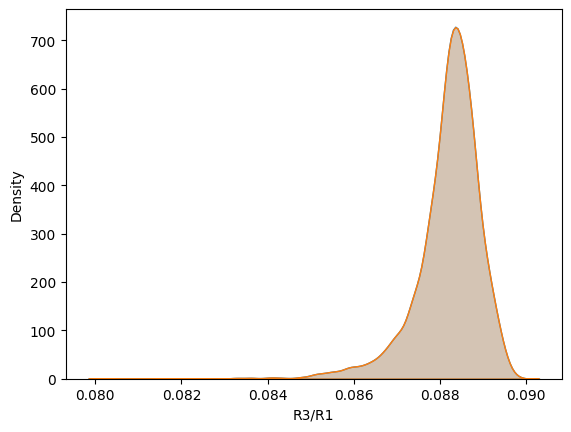

In [24]:
sns.kdeplot(data.iloc[:,9], shade=True)
sns.kdeplot(data.iloc[:,10], shade=True)

### 1.7: 该数据有部分远超2个标准差，是否会对训练造成严重影响

<AxesSubplot:xlabel='vv/[(v+)-(v-)]', ylabel='Density'>

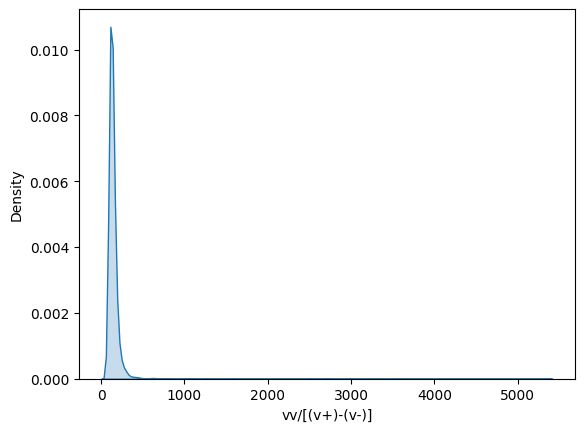

In [25]:
sns.kdeplot(data.iloc[:,11], shade=True)

### 1.8: Polarity

<AxesSubplot:xlabel='polarity', ylabel='Density'>

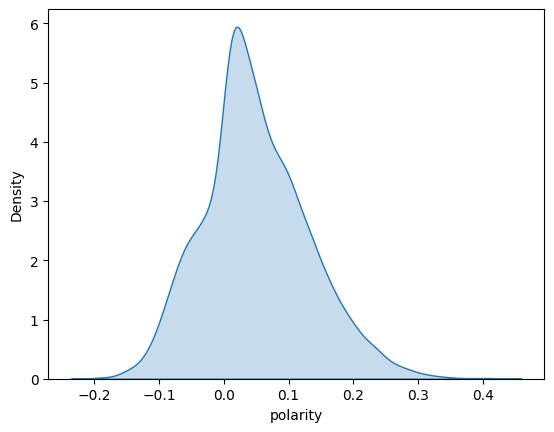

In [26]:
sns.kdeplot(data.iloc[:,12], shade=True)

# 2. Train + Validate, 获得 RMSE

In [8]:
data = pd.read_csv("data.csv")
shuffled_data = shuffle(data).reset_index(drop=True)
shuffled_data.tail()

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
7315,1856,0.38304,0.381120,0.39244,26538291.51,26539448.57,2336096.418,50.674030,1.00004,0.088030,0.088020,204.263220,0.065990
7316,168,0.38265,0.379040,0.39281,26537415.30,26535261.51,2341950.603,50.806860,0.99992,0.088250,0.088260,108.881570,-0.052660
7317,1076,0.38774,0.384180,0.39120,26537570.01,26534923.46,2359926.686,52.287020,0.99990,0.088930,0.088940,110.117140,-0.070050
7318,2084,0.38095,0.376100,0.39468,26536271.69,26534329.72,2346707.691,49.349180,0.99993,0.088430,0.088440,81.386330,-0.162410
7319,3475,0.37706,0.373856,0.40250,26419855.11,26419855.11,2335733.888,49.684868,1.00000,0.088408,0.088408,125.604947,0.043932


In [9]:
testset = shuffled_data.loc[0:1463].reset_index(drop=True)
train_valid = shuffled_data.loc[1464:].reset_index(drop=True)
#1098/1464
testset

,no.,v+,v-,vv,R1,R2,R3,I3(nA),R2/R1,R3/R1,R3/R2,vv/[(v+)-(v-)],polarity
0,1593,0.376890,0.372211,0.399646,34867388.74,34867388.74,3073263.293,37.567595,1.0,0.088141,0.088141,85.410206,0.241713
1,767,0.372232,0.368833,0.405365,28431210.24,28431210.24,2509307.662,46.167574,1.0,0.088259,0.088259,119.272180,0.126794
2,780,0.363913,0.358319,0.415296,30999232.83,30999232.83,2615187.518,39.981902,1.0,0.084363,0.084363,74.240951,0.131004
3,222,0.368835,0.363800,0.413555,29266706.21,29266706.21,2554393.984,42.720602,1.0,0.087280,0.087280,82.139489,0.049778
4,2719,0.362554,0.359061,0.414162,25229966.46,25229966.46,2218911.595,50.178626,1.0,0.087947,0.087947,118.568463,0.044134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,517,0.378047,0.375404,0.398294,25381935.61,25381935.61,2261436.663,51.617913,1.0,0.089096,0.089096,150.668138,0.074262
1460,681,0.398301,0.396295,0.376791,24145915.08,24145915.08,2121900.199,57.815232,1.0,0.087878,0.087878,187.787060,0.034232
1461,816,0.384093,0.382052,0.391088,23546473.33,23546473.33,2081203.494,57.638913,1.0,0.088387,0.088387,191.593361,0.023330
1462,665,0.394648,0.391375,0.377031,28063602.06,28063602.06,2411000.624,49.202459,1.0,0.085912,0.085912,115.188454,0.027723


## 各个模型的 RMSE

### 1. Linear Regression

In [24]:
linear()

0.06826978214098793

### 2. Ridge Regression

In [25]:
ridge()

0.07122638495203079

### 3. Support Vector Regression

In [26]:
svr()

poly 0.01
0.07717192912810736
poly 0.1
0.07643946673354118
rbf 0.01
0.057186866579573815


0.057186866579573815

### 4. Decision Tree

In [27]:
decision_tree()

['friedman_mse', 'best', 'auto']


0.04048174017461474

### 5. Polynomial Regression

In [28]:
poly()

[4, True, True]


0.047307665673018015

### MLP

In [29]:
mlp()

Epoch 1/2
162/162 [==============================] - 2s 3ms/step - loss: 0.0213 - val_loss: 0.0067
Epoch 2/2
46/46 [==============================] - 0s 868us/step
Epoch 1/2
162/162 [==============================] - 1s 3ms/step - loss: 0.0842 - val_loss: 0.0080
Epoch 2/2
46/46 [==============================] - 0s 894us/step
Epoch 1/2
162/162 [==============================] - 1s 3ms/step - loss: 0.0143 - val_loss: 0.0068
Epoch 2/2
46/46 [==============================] - 0s 848us/step
Epoch 1/2
162/162 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0068
Epoch 2/2
46/46 [==============================] - 0s 909us/step
Epoch 1/2
162/162 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0072
Epoch 2/2
46/46 [==============================] - 0s 885us/step


0.08507793686202722

# 3. 各模型的 implementation

In [13]:
# 线性回归
def linear():
    total_error = 0
    kf = KFold(n_splits=5)
    
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()
        
        
        lr = LinearRegression()
        lr.fit(x_train, y_train)
        predicted = lr.predict(x_v)
        
        total_error = total_error + rmse(predicted, y_v_numpy)
        pass
    
    return total_error/5

In [14]:
def ridge():
    kf = KFold(n_splits=5)

    total = 0

    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()

        ridge = Ridge()
        ridge.fit(x_train, y_train)
        total = total + rmse(ridge.predict(x_v), y_v)
        
    return total/5

In [15]:
# SVR
def svr():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    # 'linear', 'sigmoid' too slow
    # 'precomputed' must be a square matrix
    for kr in ['poly', 'rbf']:
        for eps in [0.01,0.1, 1, 10]:
            total = 0
            for train, test in kf.split(shuffled_data):
                train_data = shuffled_data.loc[train]
                validate_data = shuffled_data.loc[test]
                y_train = train_data['polarity']
                x_train = train_data.iloc[:, 1:12]
                y_v = validate_data['polarity']
                x_v = validate_data.iloc[:, 1:12]
                y_v_numpy = y_v.to_numpy()


                svr = SVR (kernel = kr, epsilon = eps)
                svr.fit(x_train, y_train)
                svr_predicted = svr.predict(x_v)
                total += rmse(svr_predicted, y_v)
                pass
            if total/5 < least_rmse:
                print (kr, eps)
                print (total/5)
                least_rmse = total/5
                pass
    return least_rmse

In [16]:
# 决策树
def decision_tree():    
    kf = KFold(n_splits=5)
    # grid search
    least_rmse = 1000000000
    
    for cri in ['squared_error', 'friedman_mse', 'absolute_error']:
        for sp in ['best', 'random']:
            for max_feat in ['auto', 'sqrt', 'log2', None]:
                
                total = 0
                # cross validation
                for train, test in kf.split(shuffled_data):
                    train_data = shuffled_data.loc[train]
                    validate_data = shuffled_data.loc[test]
                    y_train = train_data['polarity']
                    x_train = train_data.iloc[:, 1:12]
                    y_v = validate_data['polarity']
                    x_v = validate_data.iloc[:, 1:12]
                    y_v_numpy = y_v.to_numpy()
                
                    decision = DecisionTreeRegressor(criterion = cri, splitter=sp, max_features = max_feat)
                    decision.fit(x_train, y_train)
                    result = decision.predict(x_v)
                    total = total + rmse(result, y_v)
                    pass
                
                
                if total/5 < least_rmse:
                    least_rmse = total/5
                    best_combination = [cri, sp, max_feat]
       

    print (best_combination)
    return least_rmse

In [17]:
def poly ():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for d in [2,3,4]:
        for interaction in [True, False]:
            for bias in [True, False]:
                total = 0
                
                # cross validation
                for train, test in kf.split(shuffled_data):
                    train_data = shuffled_data.loc[train]
                    validate_data = shuffled_data.loc[test]
                    y_train = train_data['polarity']
                    x_train = train_data.iloc[:, 1:12]
                    y_v = validate_data['polarity']
                    x_v = validate_data.iloc[:, 1:12]
                    y_v_numpy = y_v.to_numpy()
                
    
                    lr = LinearRegression()
                    quadratic = PolynomialFeatures(degree=d, interaction_only=interaction, include_bias=bias)
                    X_train_quad = quadratic.fit_transform(x_train)
                    lr.fit(X_train_quad, y_train)
                    total = total + rmse(y_v, lr.predict(quadratic.fit_transform(x_v)))
                    pass
                
                if total/5 < least_rmse:
                    least_rmse = total/5
                    best_combination = [d, interaction, bias]
                    pass
                    
    print (best_combination)    
    return least_rmse

In [18]:
def MLP(x_train,y_train,x_v):
    
    size, features = x_train.shape
    
    inputs = tf.keras.Input(shape=(features, ))
    hidden = tf.keras.layers.Dense(64, activation='tanh')(inputs)
    #hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
    outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

    tf_model = tf.keras.Model(inputs, outputs)
    tf_model.compile(
        optimizer = 'adam',
        loss = 'mse'
    )

    history = tf_model.fit(
        x_train,
        y_train,
        validation_split=0.12,
        batch_size=32,
        epochs=2
    )
    result = tf_model.predict(x_v)
    return result

In [19]:
def mlp():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    #for d in [2,3,4]:
    #    for interaction in [True, False]:
    #        for bias in [True, False]:
    total = 0
                
                # cross validation
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()


       
        total = total + rmse(y_v, MLP(x_train,y_train,x_v)[:,0])
        pass

    if total/5 < least_rmse:
        least_rmse = total/5
        #best_combination = [d, interaction, bias]
        pass
                    
    #print (MLP(x_train,y_train,x_v)[:,0])    
    return least_rmse

In [20]:
from sklearn.neural_network import MLPRegressor
def newmlp():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for hidden in [(25)]:#(10),(15),(20),(25),(30),多层效果不佳
        for act in ['logistic','tanh']:#'identity','relu'不好
            for sol in ['lbfgs','adam']:#,'adam'
                for alp in [0.0001]:#0.0001,0.001,0.01,0.1
                    #for lr in ['constant','invscaling','adaptive']:
                        for mi in [10]:#1,10,100,200
                                total = 0
                                # cross validation
                                for train, test in kf.split(train_valid):
                                    train_data = train_valid.loc[train]
                                    validate_data = train_valid.loc[test]
                                    y_train = train_data['polarity']
                                    x_train = train_data.iloc[:, 1:12]
                                    y_v = validate_data['polarity']
                                    x_v = validate_data.iloc[:, 1:12]
                                    y_v_numpy = y_v.to_numpy()

                                    mlpr = MLPRegressor(hidden_layer_sizes=hidden, ## 隐藏层的神经元个数
                                    activation=act, 
                                    solver=sol, 
                                    alpha=alp,   ## L2惩罚参数
                                    max_iter=mi, 
                                    #learning_rate = lr,
                                    random_state=123,
                                    early_stopping=True, ## 是否提前停止训练
                                    #validation_fraction=0.2, ## 20%作为验证集
                                    #                    tol=1e-8,
                                    )
                                    ## 拟合训练数据集
                                    mlpr.fit(x_train,y_train)
                                    result = mlpr.predict(x_v)
                                    total = total + rmse(result, y_v)
                                    pass


                                if total/5 < least_rmse:
                                    least_rmse = total/5
                                    best_combination = [hidden, act, sol,alp,mi]


    print (best_combination)
    mlpr = MLPRegressor(hidden_layer_sizes=best_combination[0], ## 隐藏层的神经元个数
                    activation=best_combination[1], 
                    solver=best_combination[2], 
                    alpha=best_combination[3],   ## L2惩罚参数
                    max_iter=best_combination[4], 
                    #learning_rate = best_combination[4],
                    random_state=123,
                    verbose = True,
                    early_stopping=True, ## 是否提前停止训练
                    #validation_fraction=0.2, ## 20%作为验证集
                    #                    tol=1e-8,
                    )
    x_test = testset.iloc[:, 1:12]
    y_test = testset['polarity']
    x_train_valid = train_valid.iloc[:, 1:12]
    y_train_valid = train_valid['polarity']
    mlpr.fit(x_train_valid,y_train_valid)
    result = mlpr.predict(x_test)
    print("test prediction result rmse: %f" %rmse(result,y_test))
    
    return least_rmse


## 定义含有4个隐藏层的MLP网络
#mlpr = MLPRegressor(hidden_layer_sizes=(64,64), ## 隐藏层的神经元个数
#                    activation='tanh', 
#                    solver='adam', 
#                    alpha=0.0001,   ## L2惩罚参数
#                    max_iter=20, 
#                    random_state=123,
#                    early_stopping=True, ## 是否提前停止训练
#                    validation_fraction=0.2, ## 20%作为验证集
#                    tol=1e-8,
#                   )

## 拟合训练数据集
#mlpr.fit(x_train,y_train)
#result = mlpr.predict(x_v)
#print(rmse(result, y_v))
#result2 = mlpr.predict(x_train)
#print(rmse(result2, y_train))
## 可视化损失函数
#plt.figure()
#plt.plot(mlpr.loss_curve_)
#plt.xlabel("iters")
#plt.ylabel(mlpr.loss)
#plt.show()


In [21]:
newmlp()

[25, 'logistic', 'lbfgs', 0.0001, 10]
test prediction result rmse: 0.078601


0.08240427606785358

In [22]:
from sklearn.neural_network import MLPRegressor
def mlp_sgd():
    least_rmse = 1000000000
    kf = KFold(n_splits=5)
    for hidden in [(25),(25,25),(25,25,25)]:#(10),(15),(20),(25),(30)
        for act in ['logistic']:#'identity','relu','tanh'
            for sol in ['sgd']:#,'adam'
                for alp in [0.0001]:
                    for lr in ['constant','invscaling','adaptive']:
                        for powt in [0.5]:
                            for mi in [1000]:#1,10,100,200,200,500
                                for mom in [0.95]:#0.85,0.9,
                                    total = 0
                                    # cross validation
                                    for train, test in kf.split(train_valid):
                                        train_data = train_valid.loc[train]
                                        validate_data = train_valid.loc[test]
                                        y_train = train_data['polarity']
                                        x_train = train_data.iloc[:, 1:12]
                                        y_v = validate_data['polarity']
                                        x_v = validate_data.iloc[:, 1:12]
                                        y_v_numpy = y_v.to_numpy()

                                        mlpr = MLPRegressor(hidden_layer_sizes=hidden, ## 隐藏层的神经元个数
                                        activation=act, 
                                        solver=sol, 
                                        alpha=alp,   ## L2惩罚参数
                                        learning_rate = lr,
                                        power_t = powt,
                                        max_iter=mi, 
                                        momentum = mom,
                                        random_state=123,
                                        early_stopping=True, ## 是否提前停止训练
                                        #validation_fraction=0.2, ## 20%作为验证集
                                        #                    tol=1e-8,
                                        )
                                        ## 拟合训练数据集
                                        mlpr.fit(x_train,y_train)
                                        result = mlpr.predict(x_v)
                                        total = total + rmse(result, y_v)
                                        pass


                                    if total/5 < least_rmse:
                                        least_rmse = total/5
                                        best_combination = [hidden, act, sol,alp,lr,powt,mi,mom]


    print (best_combination)
    mlpr = MLPRegressor(hidden_layer_sizes=best_combination[0], ## 隐藏层的神经元个数
                    activation=best_combination[1], 
                    solver=best_combination[2], 
                    alpha=best_combination[3],   ## L2惩罚参数
                    learning_rate = best_combination[4],
                    power_t = best_combination[5],
                    max_iter=best_combination[6], 
                    momentum = best_combination[7],
                    random_state=123,
                    early_stopping=True, ## 是否提前停止训练
                    #validation_fraction=0.2, ## 20%作为验证集
                    #                    tol=1e-8,
                    )
    x_test = testset.iloc[:, 1:12]
    y_test = testset['polarity']
    x_train_valid = train_valid.iloc[:, 1:12]
    y_train_valid = train_valid['polarity']
    mlpr.fit(x_train_valid,y_train_valid)
    result = mlpr.predict(x_test)
    print("test prediction result rmse: %f" %rmse(result,y_test))
    
    return least_rmse

In [30]:
def lasso():
    total_error = 0
    kf = KFold(n_splits=5)
    
    for train, test in kf.split(shuffled_data):
        train_data = shuffled_data.loc[train]
        validate_data = shuffled_data.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.iloc[:, 1:12]
        y_v = validate_data['polarity']
        x_v = validate_data.iloc[:, 1:12]
        y_v_numpy = y_v.to_numpy()
        
        
        lf = Lasso()
        lf.fit(x_train, y_train)
        predicted = lf.predict(x_v)
        
        total_error = total_error + rmse(predicted, y_v_numpy)
        pass
    
    return total_error/5

In [31]:
lasso()

0.07611872506391255

In [32]:
def ada(deleted_column, plot = False):
    total_error = 0
    kf = KFold(n_splits=5)
    DTR = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
    for train, test in kf.split(train_valid):
        train_data = train_valid.loc[train]
        validate_data = train_valid.loc[test]
        y_train = train_data['polarity']
        x_train = train_data.drop(train_data.iloc[:, [0, deleted_column, 12]], axis = 1)
        y_v = validate_data['polarity']
        x_v = validate_data.drop(validate_data.iloc[:,[0, deleted_column, 12]], axis = 1)
        y_v_numpy = y_v.to_numpy()
        
        
        lf = AdaBoostRegressor(base_estimator = DTR)
        lf.fit(x_train, y_train)
        predicted = lf.predict(x_v)
        
        total_error = total_error + rmse(predicted, y_v_numpy)
        pass
    if plot == True:
        sns.jointplot(x = y_v.to_numpy(), y = abs(predicted - y_v.to_numpy()), kind = "kde")
    
    return total_error/5

In [33]:
for column in range(1, 12):
    print('adaboost validation rmse with ',shuffled_data.columns[column],'deleted is', ada(column))

adaboost validation rmse with  v+  deleted is 0.029760970920099144
adaboost validation rmse with  v-  deleted is 0.0301308630673988
adaboost validation rmse with  vv  deleted is 0.030330619570032635
adaboost validation rmse with  R1  deleted is 0.029927168388965114
adaboost validation rmse with  R2  deleted is 0.02983118655026657
adaboost validation rmse with  R3  deleted is 0.029679485113950223
adaboost validation rmse with  I3(nA) deleted is 0.031544765572457174
adaboost validation rmse with  R2/R1 deleted is 0.029962228565667125
adaboost validation rmse with  R3/R1 deleted is 0.029801998896779352
adaboost validation rmse with  R3/R2 deleted is 0.02980186993701191
adaboost validation rmse with  vv/[(v+)-(v-)] deleted is 0.03543510715835137


0.03560091625030876

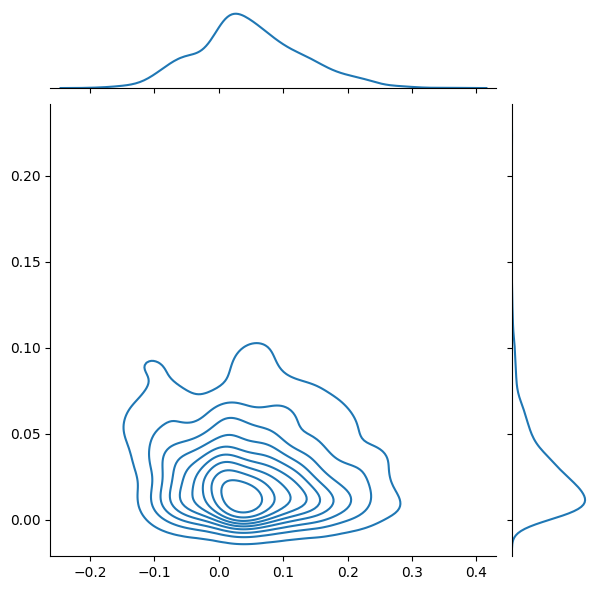

In [34]:
ada(column, True)

In [98]:

def adatest(deleted_column,  plot = False):
    deleted_columns = [0,12]
    total_error = 0
    kf = KFold(n_splits=5)
    DTR = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
    y_train = train_valid['polarity']
    deleted_columns.extend(deleted_column)
    deleted_columns.sort()
    x_train = train_valid.drop(shuffled_data.iloc[:, deleted_columns], axis = 1)

    lf = AdaBoostRegressor(base_estimator = DTR)
    lf.fit(x_train, y_train)
    pass
    y_test = testset['polarity']
    x_test = testset.drop(testset.iloc[:, deleted_columns],axis = 1)
    test_predicted = lf.predict(x_test)
    err = rmse(test_predicted, y_test.to_numpy())
    if plot == True:
        sns.jointplot(x = y_test.to_numpy(), y = abs(test_predicted - y_test.to_numpy()), kind = "kde")
    return err

In [113]:
with open('logfile', 'w') as logfile:
    counter = 0
    least_err = 10
    least_index = 0
    logfile.truncate()
    for r in range(1,4):
        result = itertools.combinations([1,2,3,4,5,6,7,8,9,10,11],r)
        for x in result:
            counter = counter + 1
            error = adatest(list(x))
            logfile.write(str(counter)+'. adaboost test rmse with '+str(shuffled_data.columns[list(x)])+' deleted is'+str(error)+'\n')
            if error < least_err: 
                least_index = counter
                least_err = error
    
    logfile.write('the least error occurs at index '+str(least_index)+'\n')
    logfile.close()

In [100]:
    for column in range(1, 12):
        print('adaboost test rmse with ',shuffled_data.columns[column],'deleted is', adatest([column]))

adaboost test rmse with  v+  deleted is 0.029684695442862796
adaboost test rmse with  v-  deleted is 0.029655581394750226
adaboost test rmse with  vv  deleted is 0.031013535972184
adaboost test rmse with  R1  deleted is 0.029564141180417468
adaboost test rmse with  R2  deleted is 0.03031736365988176
adaboost test rmse with  R3  deleted is 0.02909190067296584
adaboost test rmse with  I3(nA) deleted is 0.0314305342143048
adaboost test rmse with  R2/R1 deleted is 0.029983404206381882
adaboost test rmse with  R3/R1 deleted is 0.030171473711926196
adaboost test rmse with  R3/R2 deleted is 0.03029524620728879
adaboost test rmse with  vv/[(v+)-(v-)] deleted is 0.0357066550991292
adaboost test rmse with  Index(['v+ ', 'v- ', 'vv '], dtype='object') deleted is 0.032668492893349305


adaboost test rmse with  Index(['v+ ', 'v- '], dtype='object') deleted is 0.030164122803819558
adaboost test rmse with  Index(['v+ ', 'vv '], dtype='object') deleted is 0.03079687209641288
adaboost test rmse with  Index(['v+ ', 'R1 '], dtype='object') deleted is 0.029773757076345886
adaboost test rmse with  Index(['v+ ', 'R2 '], dtype='object') deleted is 0.02970594387447335
adaboost test rmse with  Index(['v+ ', 'R3 '], dtype='object') deleted is 0.030326921119889865
adaboost test rmse with  Index(['v+ ', 'I3(nA)'], dtype='object') deleted is 0.03126070216095007
adaboost test rmse with  Index(['v+ ', 'R2/R1'], dtype='object') deleted is 0.0299921268799689
adaboost test rmse with  Index(['v+ ', 'R3/R1'], dtype='object') deleted is 0.029804584125639504
adaboost test rmse with  Index(['v+ ', 'R3/R2'], dtype='object') deleted is 0.030205299225170804
adaboost test rmse with  Index(['v+ ', 'vv/[(v+)-(v-)]'], dtype='object') deleted is 0.037423544185878184
adaboost test rmse with  Index(['v-

In [ ]:
result = itertools.combinations([1,2,3,4,5,6,7,8,9,10,11],2)
for x in result:
    print('adaboost test rmse with ',shuffled_data.columns[list(x)],'deleted is', adatest(list(x)))

0.029805809006296216

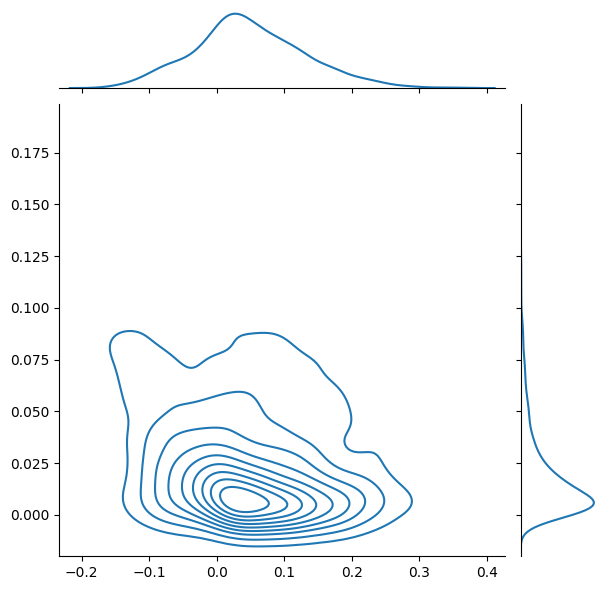

In [37]:
adatest(0, True)

In [23]:
mlp_sgd()

[(25, 25, 25), 'logistic', 'sgd', 0.0001, 'invscaling', 0.5, 1000, 0.95]
test prediction result rmse: 0.080344


0.08254381833179911